In [1]:
!pip install transformers
!pip install datasets
!pip install transformers[torch]
!pip install accelerate -U

In [2]:
from datasets import load_dataset
data=load_dataset('cnn_dailymail',version='3.0.0')
print(data['train'])

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 287113
})


In [3]:
print(data['train'][1])
print(data['train'][2])

{'article': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less li

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.DataFrame(data['train'][:1008])

In [5]:
validation_df=pd.DataFrame(data['validation'][:50])
test_df=pd.DataFrame(data['test'][:40])

In [6]:
train=data['train'].select([i for i in range(1008)])
test=data['test'].select([i for i in range(40)])
validation=data['validation'].select([i for i in range(50)])

In [7]:
len(data['train'][0])

3

In [8]:
df

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a
...,...,...,...
1003,"ISLAMABAD, Pakistan (CNN) -- Police tightened ...",Benazir Bhutto International Airport on high a...,dfc1f57db9df6e3b675c03108d51b19e63d7c783
1004,NEW YORK (CNN) -- When the Emperors Club VIP s...,New York Times: Court documents identify the w...,fe19482a81fd91431a0399f5db38325b67e94caf
1005,JERUSALEM (CNN) -- Some 43 years after a Beatl...,Former Beatle Paul McCartney to play in Tel Av...,60d6cc423cf345dd2282a122675652e47bdae48e
1006,(CNN) -- Sen. Barack Obama on Sunday tried to ...,Barack Obama criticizes John McCain for not sa...,81976e59f94c2fff12dc78eee8d90723aaed4898


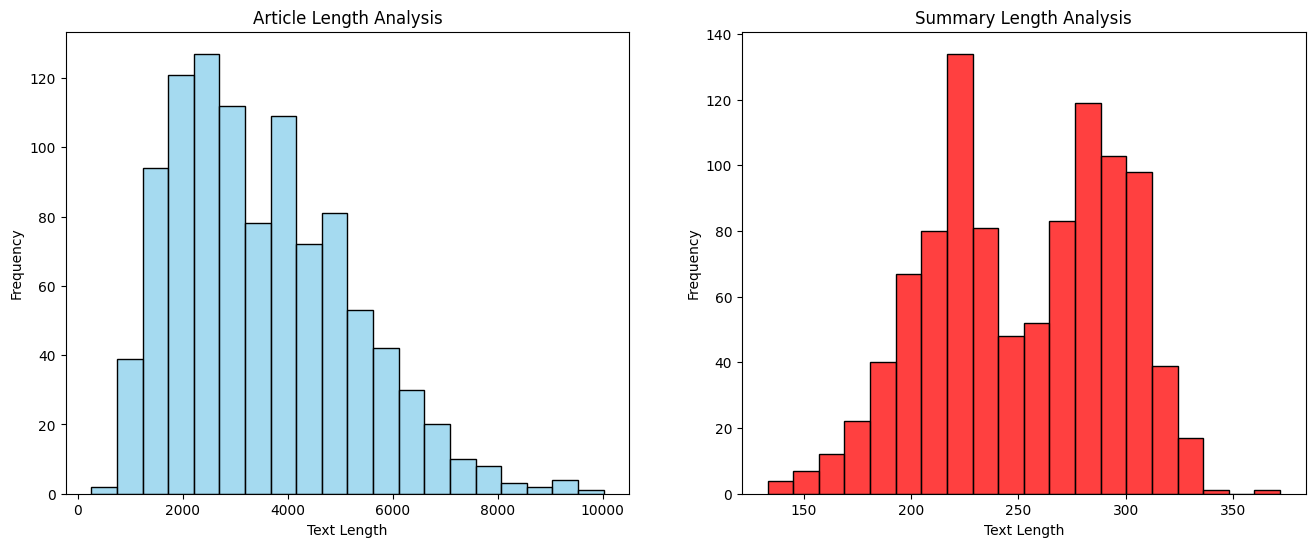

<Figure size 800x600 with 0 Axes>

In [9]:
article_length=df['article'].apply(len)
summary_length=df['highlights'].apply(len)
fig,axes=plt.subplots(1,2,figsize=(16, 6))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(article_length,bins=20,color='skyblue',edgecolor='black',ax=axes[0])
axes[0].set_title('Article Length Analysis')
axes[0].set_xlabel('Text Length')
axes[0].set_ylabel('Frequency')
sns.histplot(summary_length,bins=20,color='red',edgecolor='black',ax=axes[1])
axes[1].set_title('Summary Length Analysis')
axes[1].set_xlabel('Text Length')
axes[1].set_ylabel('Frequency')
plt.show()

In [10]:
from transformers import pipeline
summarizer=pipeline("summarization",model="facebook/bart-large-cnn")


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [11]:
sample_text = df.loc[0]['article']

In [12]:
sample_text

'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details o

In [13]:
output=summarizer(sample_text)

In [14]:
output

[{'summary_text': "Harry Potter star Daniel Radcliffe turns 18 on Monday. He gains access to a reported £20 million ($41.1 million) fortune. Radcliffe's earnings from the first five Potter films have been held in a trust fund. Details of how he'll mark his landmark birthday are under wraps."}]

In [15]:
summaries = output[0]["summary_text"]

In [16]:
summaries=summaries.replace(". ",'.\n')

In [17]:
summaries

"Harry Potter star Daniel Radcliffe turns 18 on Monday.\nHe gains access to a reported £20 million ($41.1 million) fortune.\nRadcliffe's earnings from the first five Potter films have been held in a trust fund.\nDetails of how he'll mark his landmark birthday are under wraps."

In [18]:
df.loc[0]['highlights']

"Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .\nYoung actor says he has no plans to fritter his cash away .\nRadcliffe's earnings from first five Potter films have been held in trust fund ."

In [19]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.1 MB/s eta 0:00:00


In [20]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=b9df1622ba8873dfa33c9e0cfe54bb5c5000b864148cbd3f11efe66087926d50
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [21]:
import evaluate
rouge = evaluate.load('rouge')

In [22]:
[df.loc[0]['highlights']]

["Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .\nYoung actor says he has no plans to fritter his cash away .\nRadcliffe's earnings from first five Potter films have been held in trust fund ."]

In [23]:
results=rouge.compute(predictions=[summaries],references=[df.loc[0]['highlights']])


In [24]:
results['rouge1']

0.6136363636363635

In [25]:
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
device="cuda" if torch.cuda.is_available() else "cpu"
model="facebook/bart-large-cnn"
tokenizer=AutoTokenizer.from_pretrained(model)
bart=AutoModelForSeq2SeqLM.from_pretrained(model).to(device)

In [26]:
articles=df['article'].tolist()
summaries=df['highlights'].tolist()
a=[]
b=[]

In [27]:
for i in range(0,len(articles),18):
        a.append(articles[i:i+18])
        b.append(summaries[i:i+18])

In [28]:
all_summaries=[]
decoded_summaries=[]
rouge_scores=[]

In [29]:
test_articles=test_df['article'].tolist()
test_summaries=test_df['highlights'].tolist()
c=[]
d=[]
for i in range(0,len(test_articles),18):
        c.append(test_articles[i:i+18])
        d.append(test_summaries[i:i+18])

pre_test_summaries=[]
pre_decoded_test_summaries=[]
pre_test_rouge_scores=[]

# Testing a Pre-Trained Model

In [30]:
from tqdm import tqdm
for article_batch,summary_batch in tqdm(
        zip(c,d),total=len(d)):
        inputs=tokenizer(article_batch,max_length=1024,padding=True,truncation=True,return_tensors="pt")
        summaries = bart.generate(input_ids=inputs["input_ids"].to(device),
                                  attention_mask=inputs["attention_mask"].to(device)
                                  ,length_penalty=0.8,num_beams=8,max_length=350)
        pre_test_summaries.append(summaries)
        d_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]

        d_summaries = [d.replace(". ",'.\n') for d in d_summaries]
        pre_decoded_test_summaries.append(d_summaries)
        score=rouge.compute(predictions=d_summaries, references=summary_batch)
        pre_test_rouge_scores.append(score)

100%|██████████| 3/3 [06:24<00:00, 128.19s/it]


In [32]:
scores=[i['rouge1'] for i in pre_test_rouge_scores]
mean_score=sum(scores)/len(scores)
print('Rouge Score for the pretrained model on the train data is ',mean_score)

Rouge Score for the pretrained model on the train data is  0.3078221376107055


## Rouge Score for the Pre-trained Model is 30.78%

In [33]:
encodings=tokenizer(articles,truncation=True)
with tokenizer.as_target_tokenizer():
  encodings_summary=tokenizer(df['highlights'].tolist(),max_length=350,truncation=True)

shaped_df={'input_ids':encodings['input_ids'],'attention_mask':encodings['attention_mask'],'labels':encodings_summary['input_ids']}


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


# Fine Tuning a Model

In [34]:
from transformers import DataCollatorForSeq2Seq
seq2seq_data_collator=DataCollatorForSeq2Seq(tokenizer, model=bart)

In [35]:
!pip install transformers[torch]

In [36]:
!pip install accelerate -U

In [37]:
from transformers import TrainingArguments, Trainer

trainer_args = TrainingArguments(
    output_dir='bart', num_train_epochs=1, warmup_steps=500,
    per_device_train_batch_size=1, per_device_eval_batch_size=1,
    weight_decay=0.01, logging_steps=10,
    evaluation_strategy='steps', eval_steps=500, save_steps=1e6,
    gradient_accumulation_steps=16
)

In [38]:
def modify_data(d):
    input_encodings=tokenizer(d['article'],max_length=1024,truncation=True)
    with tokenizer.as_target_tokenizer():
        target_encodings=tokenizer(d['highlights'],max_length=350,truncation=True)

    return {
        'input_ids':input_encodings['input_ids'],'attention_mask':input_encodings['attention_mask'],'labels':target_encodings['input_ids']
    }

In [39]:

from datasets import DatasetDict
cdt = DatasetDict({
    'train': train,
    'validation': validation,
    'test': test
})

In [40]:
cdt

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 1008
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 50
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 40
    })
})

In [41]:
shaped_cdt=cdt.map(modify_data,batched=True)

Map:   0%|          | 0/1008 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

In [42]:
shaped_cdt['train']

Dataset({
    features: ['article', 'highlights', 'id', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 1008
})

In [43]:
trainer = Trainer(model=bart,args=trainer_args,
                  tokenizer=tokenizer,data_collator=seq2seq_data_collator,
                  train_dataset=shaped_cdt['train'],
                  eval_dataset=shaped_cdt['validation'])

In [44]:
trainer.train()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss


TrainOutput(global_step=63, training_loss=2.119646632482135, metrics={'train_runtime': 5645.1703, 'train_samples_per_second': 0.179, 'train_steps_per_second': 0.011, 'total_flos': 1472691486425088.0, 'train_loss': 2.119646632482135, 'epoch': 1.0})

In [45]:
test_summaries=[]
decoded_test_summaries=[]
test_rouge_scores=[]
test_articles=test_df['article'].tolist()
test_summaries=test_df['highlights'].tolist()
c=[]
d=[]
for i in range(0,len(test_articles),18):
        c.append(test_articles[i:i+18])
        d.append(test_summaries[i:i+18])

In [46]:
len(c)

3

In [47]:
from tqdm import tqdm
for article_batch,summary_batch in tqdm(
        zip(c,d),total=len(c)):
        inputs=tokenizer(article_batch,max_length=1024,padding=True,truncation=True,return_tensors="pt")
        summaries=bart.generate(input_ids=inputs["input_ids"].to(device),
                                  attention_mask=inputs["attention_mask"].to(device)
                                  ,length_penalty=0.8,num_beams=8,max_length=350)
        test_summaries.append(summaries)
        d_summaries = [tokenizer.decode(s,skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]
        d_summaries=[d.replace(". ",'.\n') for d in d_summaries]
        decoded_test_summaries.append(d_summaries)
        score=rouge.compute(predictions=d_summaries, references=summary_batch)
        test_rouge_scores.append(score)

100%|██████████| 3/3 [06:48<00:00, 136.12s/it]


In [48]:
test_scores=[i['rouge1'] for i in test_rouge_scores]
test_avg_score=sum(test_scores)/len(test_scores)

In [49]:
print('Rouge Test scores of a Fine Tuned model for the test data is ',test_avg_score)

Rouge Test scores of a Fine Tuned model for the test data is  0.340580240065859


## Rouge score for the Fine Tuned model is 34.05%

In [50]:
test_scores

[0.32714618050174327, 0.3511370683741645, 0.3434574713216693]

In [51]:
from transformers import Seq2SeqTrainer
from transformers import Seq2SeqTrainingArguments
from transformers import BitsAndBytesConfig

In [52]:
!pip install peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 3.2 MB/s eta 0:00:00


In [53]:
from peft import LoraConfig
from peft import get_peft_model
from peft import prepare_model_for_kbit_training
from peft import TaskType

In [54]:
!pip install accelerate


In [55]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# PEFT Implementation ( LoRA )

In [56]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16)

### Here r=16 specifies the rank of the decompostion matrix

In [57]:
lora_bart=AutoModelForSeq2SeqLM.from_pretrained(model)#,quantization_config=bnb_config, device_map={"":0})
#lora_bart.gradient_checkpointing_enable()
lora_bart=prepare_model_for_kbit_training(lora_bart)
config=LoraConfig(r=16,task_type=TaskType.SEQ_2_SEQ_LM,inference_mode=False)
lora_bart=get_peft_model(lora_bart,config)


In [58]:
train_params=0
total_params=0
for _,param in lora_bart.named_parameters():
  total_params+=param.numel()
  if param.requires_grad:
    train_params+=param.numel()
print("Total parameters are {0}\n Trainable parameters are {1}\n Trainable Percentage is {2}".format(total_params,train_params,100*train_params/total_params))


Total parameters are 408649728
 Trainable parameters are 2359296
 Trainable Percentage is 0.5773394274717344


In [59]:
lora_data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=lora_bart)

In [60]:
lora_trainer = Trainer(model=lora_bart,args=trainer_args,
                  tokenizer=tokenizer,data_collator=lora_data_collator,
                  train_dataset=shaped_cdt['train'],
                  eval_dataset=shaped_cdt['validation'])

In [61]:
lora_trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=63, training_loss=2.8527074844118148, metrics={'train_runtime': 4275.078, 'train_samples_per_second': 0.236, 'train_steps_per_second': 0.015, 'total_flos': 1482542151204864.0, 'train_loss': 2.8527074844118148, 'epoch': 1.0})

In [62]:
lora_test_summaries=[]
lora_decoded_test_summaries=[]
lora_test_rouge_scores=[]

In [63]:
from tqdm import tqdm
for article_batch,summary_batch in tqdm(
        zip(c,d),total=len(c)):
        inputs=tokenizer(article_batch,max_length=1024,padding=True,truncation=True,return_tensors="pt")
        summaries=lora_bart.generate(input_ids=inputs["input_ids"].to(device),
                                  attention_mask=inputs["attention_mask"].to(device)
                                  ,length_penalty=0.8,num_beams=8,max_length=350)
        lora_test_summaries.append(summaries)
        d_summaries = [tokenizer.decode(s,skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]
        d_summaries=[d.replace(". ",'.\n') for d in d_summaries]
        lora_decoded_test_summaries.append(d_summaries)
        score=rouge.compute(predictions=d_summaries, references=summary_batch)
        lora_test_rouge_scores.append(score)

100%|██████████| 3/3 [06:46<00:00, 135.47s/it]


In [64]:
l_scores=[i['rouge1'] for i in lora_test_rouge_scores]
avg_l_score=sum(l_scores)/len(l_scores)
print('Rouge Test score for test data using LoRA is ',avg_l_score)

Rouge Test score for test data using LoRA is  0.30881823582717177


## Rouge scores for LoRA model is 30.88%

## Human Evaluation Strategy

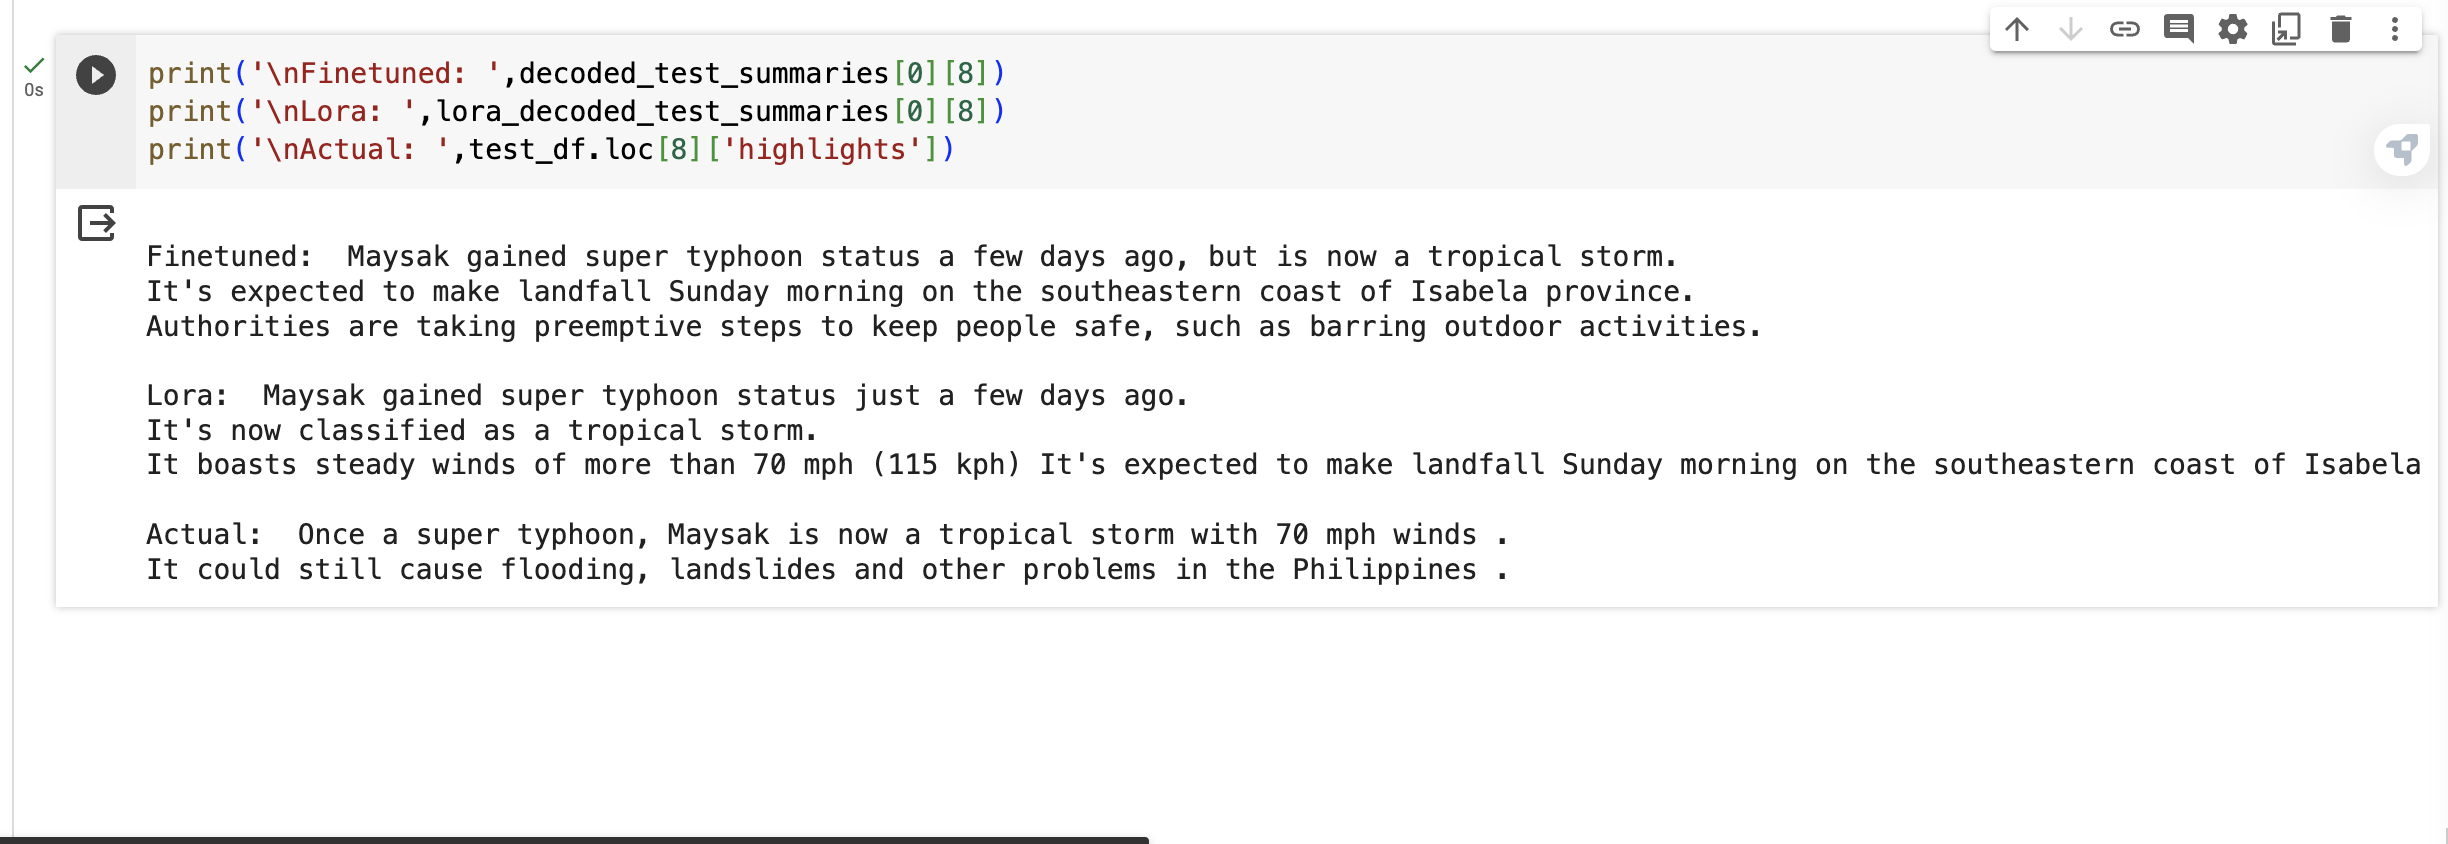

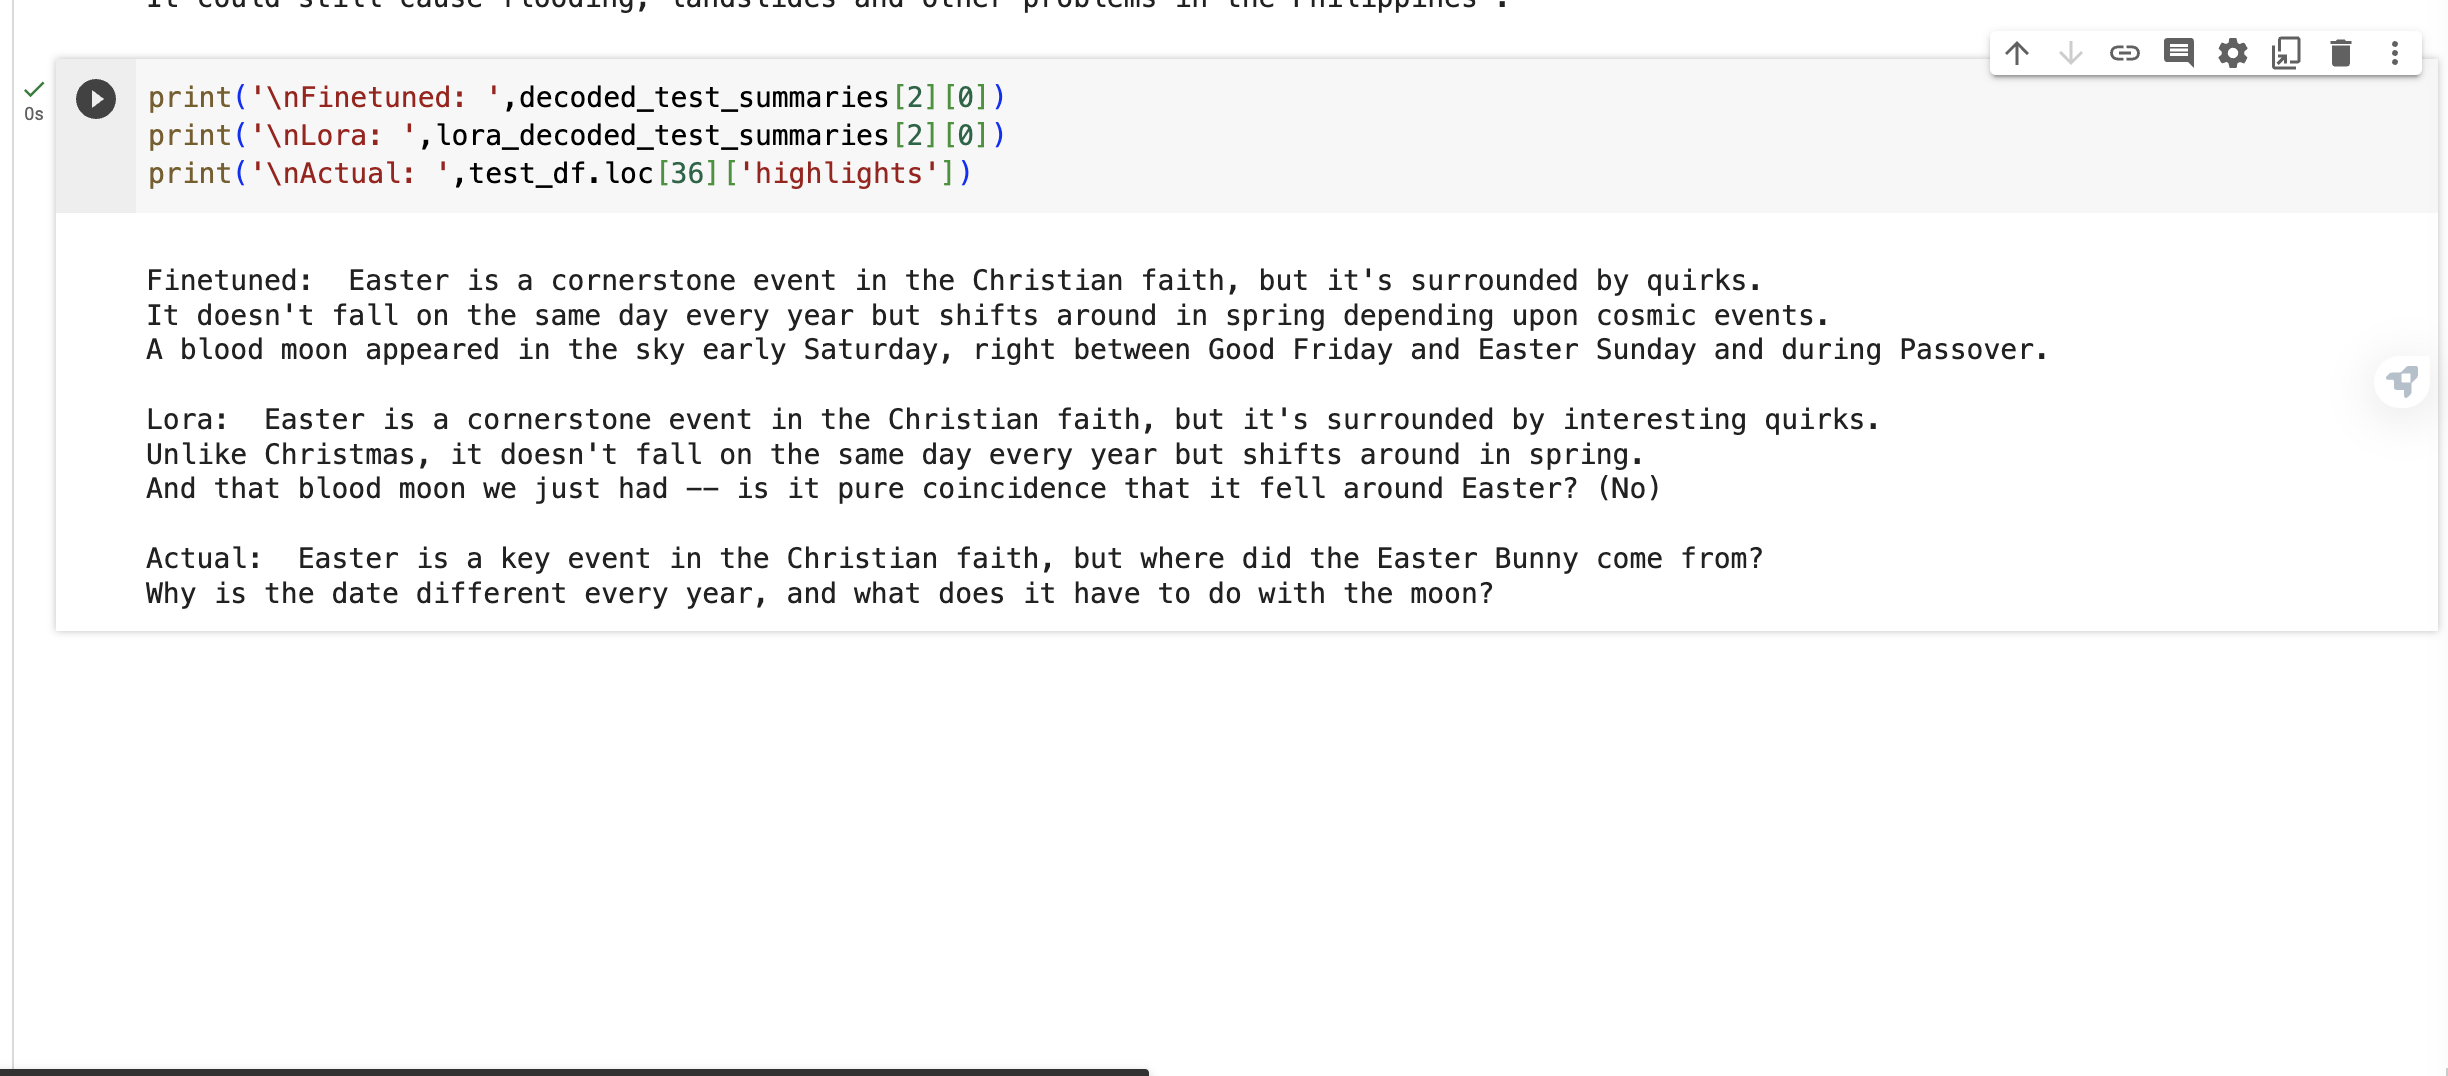